# Salaries of San Francisco City Employees

## Research Questions:

### - Evolution of Salaries Since 2013

### - Distribution of Salaries Among City Employees (identifying significant disparities in compensation)

### - Salary Variations Based on Job Categories (highest and lowest paying categories)

### - Evolution of the Total Cost of Salaries and Benefits for the City of San Francisco Each Year

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Download database

df = pd.read_csv("Employee_Compensation.csv")
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,"SEIU, Local 1021, Misc",...,37486688,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31
1,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37486043,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37615772,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37495705,89106.07,0.00,2164.00,91270.07,17446.56,14733.76,7253.08,39433.40,130703.47
4,3,9900,9910,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,"SEIU, Local 1021, Misc",...,39596095,2585.45,0.00,0.00,2585.45,0.00,0.00,227.78,227.78,2813.23


In [3]:
df.shape

(881800, 22)

In [6]:
df.dtypes.value_counts()

float64    10
object      9
int64       3
dtype: int64

# Heatmap indicating missing values in the DataFrame

Organization Group Code    0.000000
Other Benefits             0.000000
Health and Dental          0.000000
Retirement                 0.000000
Total Salary               0.000000
Other Salaries             0.000000
Overtime                   0.000000
Salaries                   0.000000
Employee Identifier        0.000000
Total Benefits             0.000000
Job Family                 0.000000
Organization Group         0.000000
Year                       0.000000
Year Type                  0.000000
Job Code                   0.000000
Job Family Code            0.000000
Total Compensation         0.000000
Department                 0.000002
Department Code            0.000002
Job                        0.000006
Union                      0.000203
Union Code                 0.000204
dtype: float64

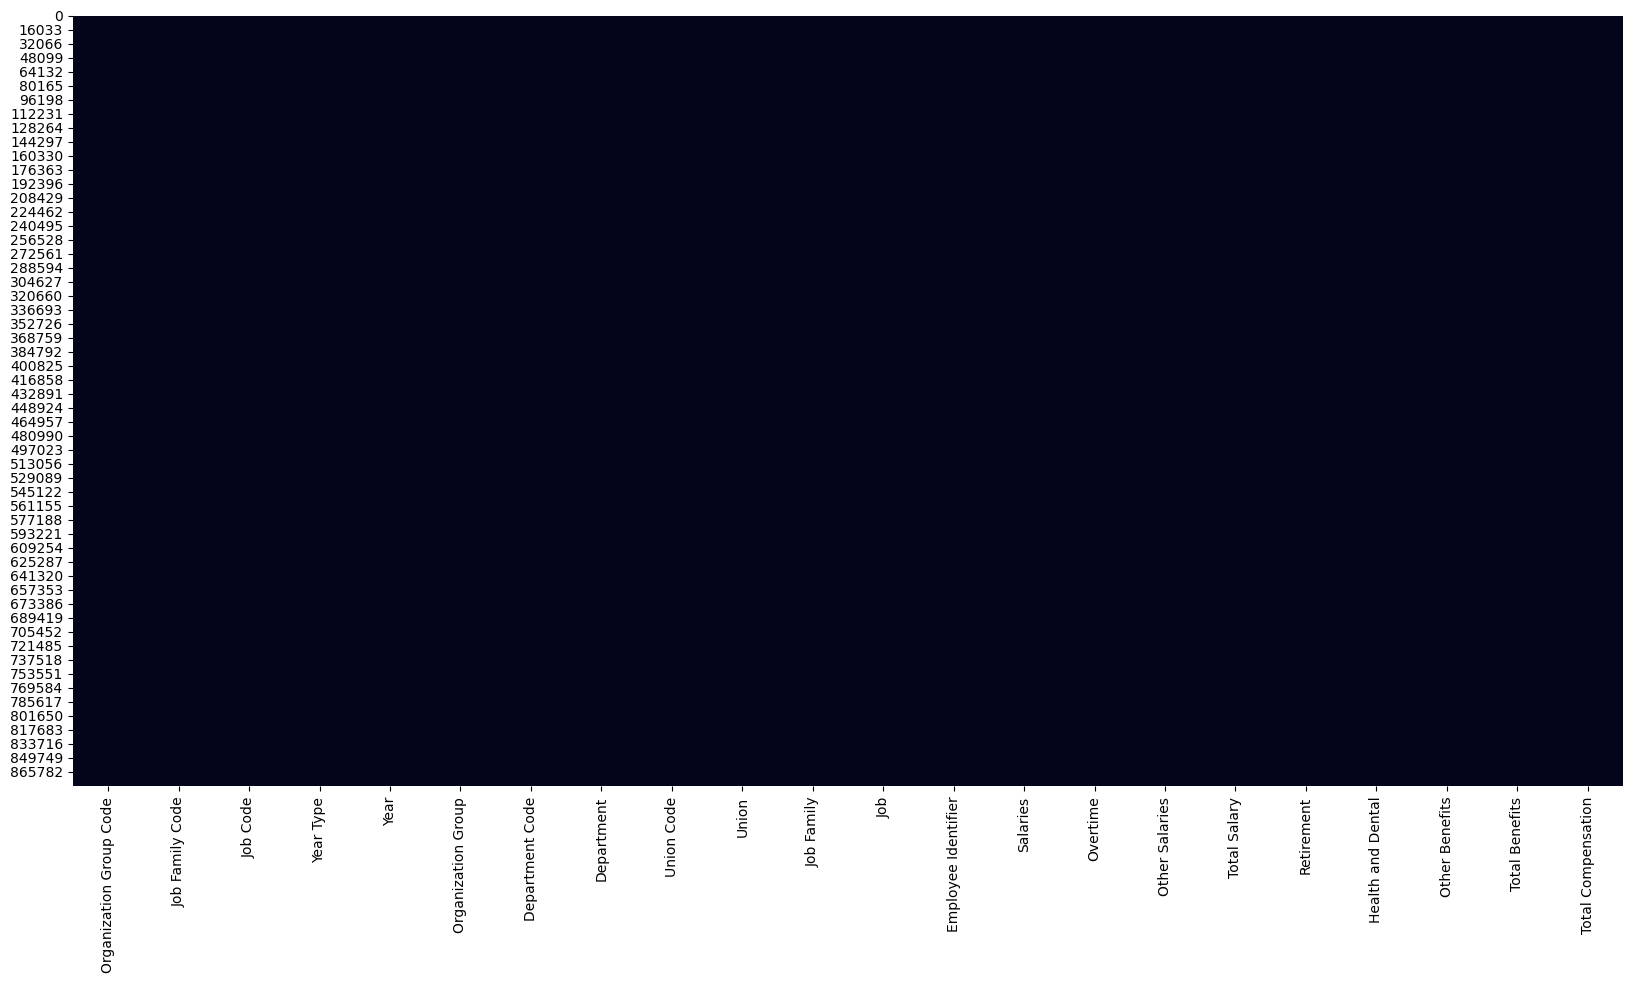

In [11]:
# Import the matplotlib.pyplot and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap indicating missing values in the DataFrame df
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

# Display the proportions of missing values per column
(df.isna().sum() / df.shape[0]).sort_values(ascending=True)

The dataframe does not contain any NaN values, which will make data cleaning easier.

# Data cleaning

In [13]:
# Get the list of column names (variables) in the DataFrame df
variables = df.columns.tolist()

# Display the list of variables
print(variables)

['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type', 'Year', 'Organization Group', 'Department Code', 'Department', 'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']


In [22]:
# Get unique values in the 'Year Type' column of the DataFrame df
unique_year_types = df['Year Type'].unique()
print(unique_year_types)

# Count the occurrences of each unique value in the 'Year Type' column
count_by_year_type = df['Year Type'].value_counts()
print(count_by_year_type)

['Fiscal' 'Calendar']
Fiscal      461597
Calendar    420203
Name: Year Type, dtype: int64


In [3]:
# Filter the DataFrame df to exclude rows where the 'Year Type' is 'Fiscal'
df = df[df['Year Type'] != 'Fiscal']

# Display the shape (number of rows and columns) of the filtered DataFrame
df.shape

(420203, 22)

In [4]:
# Remove specific columns from the DataFrame df
df = df.drop(['Organization Group Code', 'Organization Group', 'Year Type', 'Job Family Code', 'Job Code', 'Department Code', 'Union Code', 'Union', 'Employee Identifier'], axis=1)

In [5]:
# Remove rows with missing values (NaN) from the DataFrame df
df = df.dropna(axis=0)

In [84]:
df.shape

(420202, 12)

In [104]:
# Select only the columns of interest
selected_columns = ['Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 
                    'Retirement', 'Health and Dental', 'Other Benefits', 
                    'Total Benefits', 'Total Compensation']

# Use the describe() method on these selected columns
summary = df[selected_columns].describe().round()

# Display the statistical summary
print(summary)

       Salaries  Overtime  Other Salaries  Total Salary  Retirement  \
count  420202.0  420202.0        420202.0      420202.0    420202.0   
mean    75318.0    6271.0          3913.0       85502.0     15272.0   
std     50422.0   15171.0          7803.0       59487.0     11406.0   
min     -9942.0  -22453.0         -7059.0       -2596.0    -30621.0   
25%     35705.0       0.0             0.0       39264.0      6219.0   
50%     73360.0       0.0           817.0       81065.0     15231.0   
75%    108166.0    5076.0          4676.0      121002.0     21952.0   
max    596616.0  374503.0        342803.0      620353.0    169486.0   

       Health and Dental  Other Benefits  Total Benefits  Total Compensation  
count           420202.0        420202.0        420202.0            420202.0  
mean             10776.0          5394.0         31441.0            116943.0  
std               6189.0          3821.0         19387.0             77281.0  
min              -3831.0        -10636.0    

In [72]:
summary.describe().round()

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,168731.0,99846.0,96644.0,178035.0,78643.0,65820.0,58745.0,92356.0,215622.0
std,217594.0,184340.0,177084.0,220858.0,150177.0,144441.0,146624.0,147186.0,262092.0
min,-9942.0,-22453.0,-7059.0,-2596.0,-30621.0,-3831.0,-10636.0,-21295.0,-8966.0
25%,46743.0,0.0,613.0,54431.0,10109.0,6042.0,3404.0,18267.0,71698.0
50%,74339.0,5674.0,4294.0,83284.0,15251.0,11850.0,5339.0,33192.0,116532.0
75%,186175.0,105004.0,91553.0,195802.0,58836.0,26324.0,14963.0,81834.0,229422.0
max,596616.0,420203.0,420203.0,620353.0,420203.0,420203.0,420203.0,420203.0,782614.0


In [41]:
# Get the data types of variables (columns) in the DataFrame df
types = df.dtypes

# Display the variable types
print(types)

Year                    int64
Department             object
Job                    object
Salaries              float64
Overtime              float64
Other Salaries        float64
Total Salary          float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Benefits        float64
Total Compensation    float64
dtype: object


In [6]:
# List of columns to convert from float to integer
int_columns = ['Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
               'Retirement', 'Health and Dental', 'Other Benefits',
               'Total Benefits', 'Total Compensation']

# Convert the specified columns from float to integer data type
df[int_columns] = df[int_columns].astype(int)

In [43]:
# Get the data types of variables (columns) in the DataFrame df
types = df.dtypes

# Display the variable types
print(types)

Year                   int64
Department            object
Job                   object
Salaries               int64
Overtime               int64
Other Salaries         int64
Total Salary           int64
Retirement             int64
Health and Dental      int64
Other Benefits         int64
Total Benefits         int64
Total Compensation     int64
dtype: object


In [6]:
# List of columns to be treated as numeric
numeric_columns = ['Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
               'Retirement', 'Health and Dental', 'Other Benefits',
               'Total Benefits', 'Total Compensation']

# Convert the specified columns to numeric, treating non-convertible values as NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows containing NaN values in the specified numeric columns (values less than or equal to zero)
df = df.dropna(subset=numeric_columns)

In [7]:
# Keep only rows in the DataFrame df where all values are not equal to zero
df = df[(df != 0).all(axis=1)]

In [8]:
# Define a lambda function to replace negative values with NaN
negative_to_nan = lambda x: x if x > 0 else float('nan')

# Specify the columns to clean (replace negative values with NaN)
columns_to_clean = ['Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits']

# Apply the lambda function to the specified columns
df[columns_to_clean] = df[columns_to_clean].applymap(negative_to_nan)

# Remove rows containing NaN values
df = df.dropna()

# Data description

In [114]:
df.describe().round()

,Year,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,169017.0,169017.0,169017.0,169017.0,169017.0,169017.0,169017.0,169017.0,169017.0,169017.0
mean,2018.0,87566.0,14844.0,7117.0,109528.0,18986.0,13807.0,5715.0,38510.0,148038.0
std,3.0,37756.0,20801.0,8568.0,54044.0,9562.0,3786.0,3053.0,13205.0,65127.0
min,2013.0,38.0,1.0,1.0,196.0,8.0,2.0,1.0,40.0,259.0
25%,2015.0,62952.0,2096.0,1560.0,71969.0,13447.0,12424.0,2956.0,32089.0,104917.0
50%,2018.0,81793.0,7321.0,4360.0,99194.0,17652.0,14269.0,5608.0,38607.0,138284.0
75%,2020.0,113719.0,19276.0,9652.0,142106.0,23546.0,16344.0,7887.0,45203.0,187884.0
max,2022.0,386925.0,374502.0,190794.0,597709.0,169486.0,52554.0,18909.0,195219.0,747582.0


In [112]:
df.shape

(169017, 12)

In [115]:
df.head()

,Year,Department,Job,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
971,2018,Sheriff,Deputy Sheriff,108881,70891.0,9405.0,189177,38481.0,15155,3170.0,56806.0,245984
972,2018,Sheriff,Deputy Sheriff,109842,7335.0,13619.0,130796,37099.0,15287,2172.0,54558.0,185355
973,2018,Sheriff,Deputy Sheriff (SFERS),98590,63454.0,7299.0,169345,20143.0,15338,2829.0,38311.0,207657
974,2018,Sheriff,Deputy Sheriff (SFERS),97900,7032.0,6395.0,111328,19826.0,15234,1812.0,36873.0,148202
976,2018,Sheriff,Deputy Sheriff,109842,11588.0,9737.0,131167,37098.0,15287,1922.0,54308.0,185475


In [9]:
df.describe()

,Year,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000,169420.000000
mean,2017.663847,87530.368976,14809.122431,7106.303012,109445.794418,18977.425001,13805.877659,5714.767177,38498.069837,147943.864255
std,2.816866,37756.136350,20788.855740,8564.376460,54032.706181,9559.068368,3788.729987,3052.325979,13208.061347,65119.915565
min,2013.000000,38.800000,0.010000,0.200000,196.580000,0.010000,2.760000,0.020000,40.080000,259.980000
25%,2015.000000,62946.110000,2069.040000,1560.000000,71932.170000,13444.110000,12424.510000,2956.967500,32087.320000,104874.677500
50%,2018.000000,81753.340000,7284.860000,4347.785000,99088.245000,17643.800000,14276.310000,5610.345000,38599.030000,138186.215000
75%,2020.000000,113676.000000,19230.302500,9639.082500,142002.465000,23534.700000,16342.392500,7883.170000,45193.090000,187772.665000
max,2022.000000,386925.240000,374502.760000,190794.080000,597709.420000,169486.170000,52554.390000,18909.070000,195219.620000,747582.690000


# Evolution of Salaries Since 2013

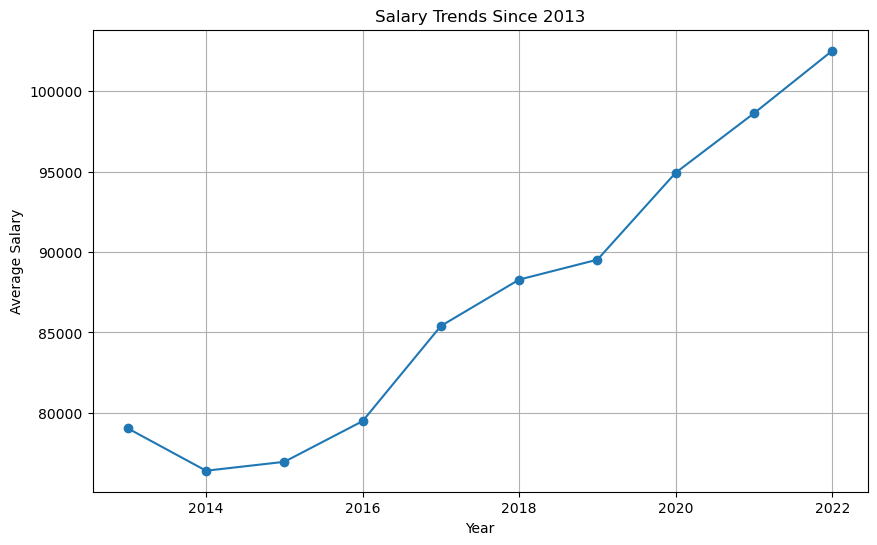

In [14]:
# Import the Pandas and Matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for years starting from 2013
df = df[df['Year'] >= 2013]

# Group the data by year and calculate the mean salaries for each year
mean_salaries_per_year = df.groupby('Year')['Salaries'].mean()

# Create a chart based on the data
plt.figure(figsize=(10, 6))
plt.plot(mean_salaries_per_year.index, mean_salaries_per_year.values, marker='o', linestyle='-')
plt.title("Salary Trends Since 2013")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.grid(True)

# Display the chart
plt.show()

The salary generally increases over our study period, going from approximately 70,000 to $105,000 from 2014 to 2022.

# Distribution of Salaries Among City Employees

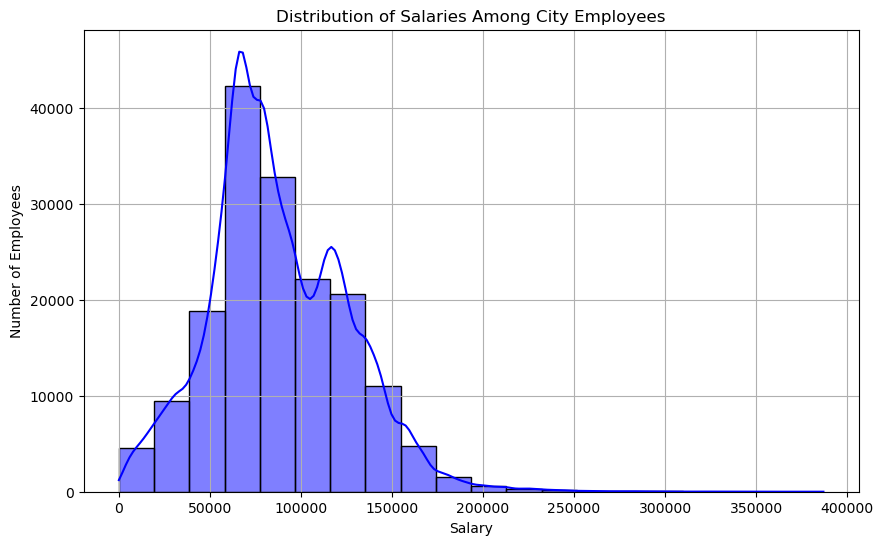

In [15]:
# Import the Pandas, Seaborn, and Matplotlib libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a salary distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salaries', bins=20, kde=True, color='blue')
plt.title("Distribution of Salaries Among City Employees")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.grid(True)

# Display the plot
plt.show()

From this graph, it is possible to observe that our data follows a left-skewed distribution. This means that the majority of the data distribution is on the left side, with values decreasing as one moves away from the central peak. This type of distribution is commonly referred to as a "left-skewed distribution" or "negative skew." When examining the extreme values in our dataset, we can see a significant concentration of salaries around $60,000 per year. However, there are extreme values where the highest salary is approximately 380,000 annually in the city of San Francisco.

# Evolution of average salaries and Benefits for the City of San Francisco Each Year

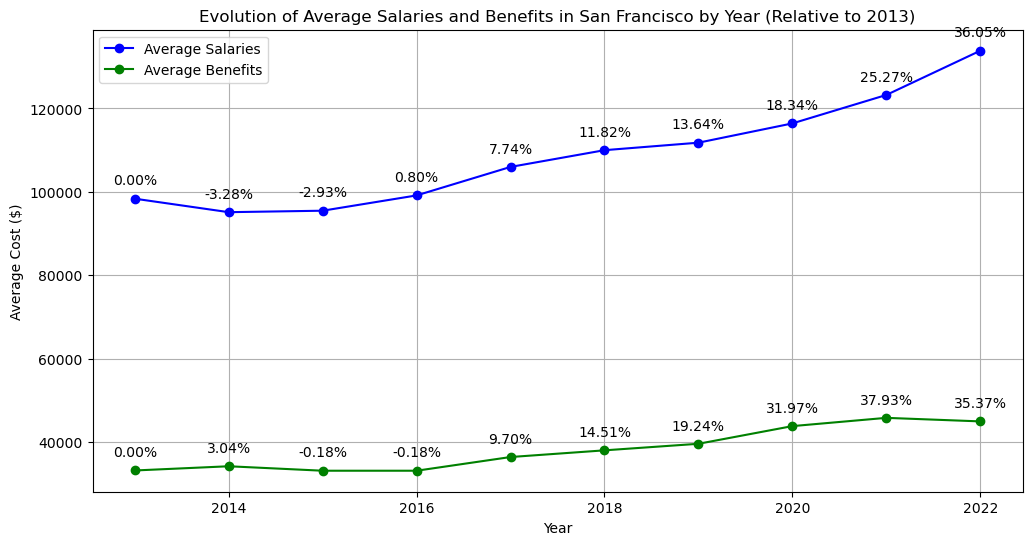

In [16]:
# Import the Pandas and Matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Choose a base year for percentage change calculation
base_year = 2013

# Calculate the average salaries and average benefits for each year
mean_salary_by_year = df.groupby('Year')['Total Salary'].mean()
mean_benefits_by_year = df.groupby('Year')['Total Benefits'].mean()

# Calculate percentage changes relative to the base year
percent_change_salary = (mean_salary_by_year / mean_salary_by_year[base_year] - 1) * 100
percent_change_benefits = (mean_benefits_by_year / mean_benefits_by_year[base_year] - 1) * 100

# Create a plot for the average salaries each year
plt.figure(figsize=(12, 6))
plt.plot(mean_salary_by_year.index, mean_salary_by_year.values, label='Average Salaries', marker='o', linestyle='-', color='blue')

# Add a line for the average benefits each year
plt.plot(mean_benefits_by_year.index, mean_benefits_by_year.values, label='Average Benefits', marker='o', linestyle='-', color='green')

# Add percentage annotations for points of interest
for year in mean_salary_by_year.index:
    salary_percent_change = percent_change_salary[year]
    benefits_percent_change = percent_change_benefits[year]
    plt.annotate(f"{salary_percent_change:.2f}%", (year, mean_salary_by_year[year]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f"{benefits_percent_change:.2f}%", (year, mean_benefits_by_year[year]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize the plot
plt.title("Evolution of Average Salaries and Benefits in San Francisco by Year (Relative to 2013)")
plt.xlabel("Year")
plt.ylabel("Average Cost ($)")
plt.legend()  # Add a legend for both curves
plt.grid(True)

# Display the plot
plt.show()

One can observe here that the average salary evolution over our study period in San Francisco increased by 36.05%. There were two years of negative growth in 2014 and 2015, before experiencing an exponential growth of 40 percentage points between 2014 and 2022.

As for benefits, their evolution reached +38%, with two years of negative growth from 2015 to 2016, followed by exponential growth.

# Salary Variations Based on Job Categories

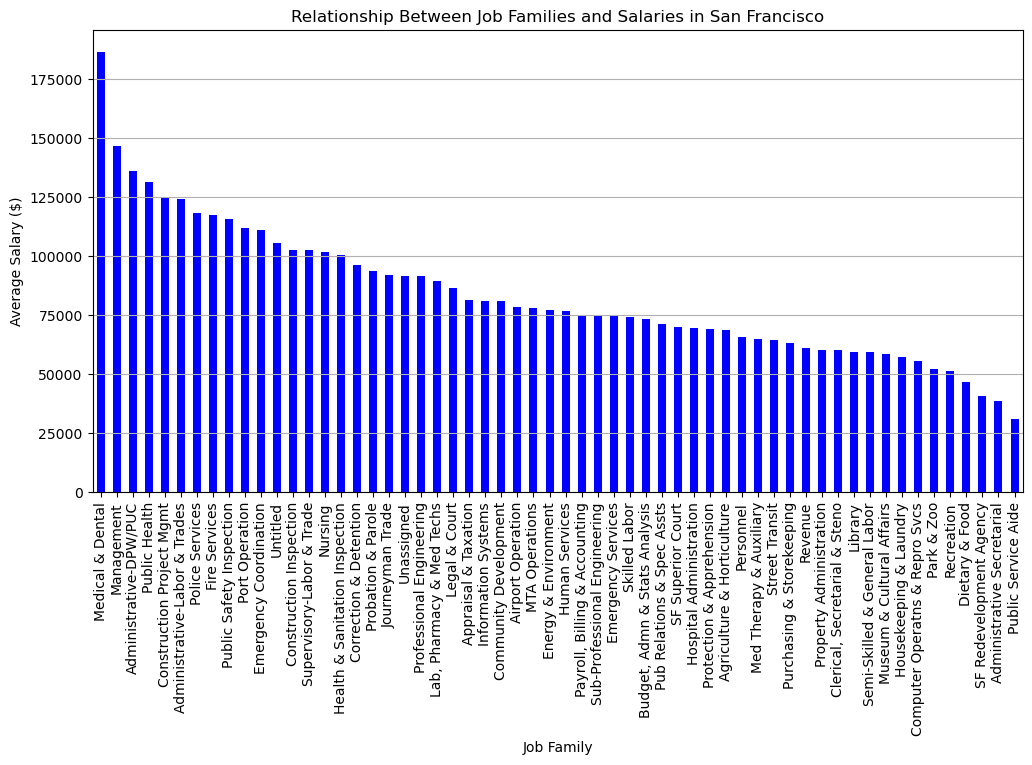

In [17]:
# Import the Pandas and Matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average salary for each job family
mean_salary_by_family = df.groupby('Job Family')['Salaries'].mean()

# Sort job families in descending order of average salary
mean_salary_by_family = mean_salary_by_family.sort_values(ascending=False)

# Create a bar chart to display the relationship between job families and salaries
plt.figure(figsize=(12, 6))
mean_salary_by_family.plot(kind='bar', color='blue')

# Customize the chart
plt.title("Relationship Between Job Families and Salaries in San Francisco")
plt.xlabel("Job Family")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Display the chart
plt.show()

Here, we can observe that the highest-paying job families are medical and dental, earning over $175,000 per year, followed by management, administrative, DPW/PUC. The lowest-paying job family is public service aide, with just over 25,000 annually, which is quite low considering the cost of living and rents in San Francisco.